In [1]:
import pandas as pd

In [2]:
dataframe=pd.read_csv("cardio_train.csv", sep = ";")# ilk argüman okunmak istenen dosyanın konumunu ifade ediyor, ikinci argüman olarak ayracı belirttik. sep ön tanımlı argümanı , dür 

In [3]:
dataframe.columns = ("Id","Yas","Cinsiyet","Boy","Agirlik","SistolikKanBasinci","DiyastolikKanBasinci","Kolestrol","Glikoz","Sigara","Alkol","FizikselAktivite","KardiyoVasküler")

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    69301 non-null  int64  
 1   Yas                   69301 non-null  int64  
 2   Cinsiyet              69301 non-null  int64  
 3   Boy                   69301 non-null  int64  
 4   Agirlik               69293 non-null  float64
 5   SistolikKanBasinci    69295 non-null  float64
 6   DiyastolikKanBasinci  69301 non-null  int64  
 7   Kolestrol             69291 non-null  float64
 8   Glikoz                69301 non-null  int64  
 9   Sigara                69301 non-null  int64  
 10  Alkol                 69301 non-null  int64  
 11  FizikselAktivite      69290 non-null  float64
 12  KardiyoVasküler       69301 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 6.9 MB


# Veri Seti Düzenleme

In [5]:
# Tüm "object" türündeki sütunları "category" türe dönüştür
dataframe[dataframe.select_dtypes(['object']).columns] = dataframe.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [6]:
dataframe['Boy']=dataframe['Boy']/100
# Vücut Kitle İndeksini (VKİ) hesapla
dataframe['VKI'] = dataframe['Agirlik'] / (dataframe['Boy'] ** 2)

# Boy ve kilo sütunlarını sil
#dataframe.drop(['Boy', 'Agirlik'], axis=1, inplace=True)

In [7]:
dataframe["Cinsiyet"]=dataframe['Cinsiyet'].map({1: 'Kadin', 2: 'Erkek'})
dataframe['Cinsiyet']=dataframe['Cinsiyet'].astype('category')

dataframe["Sigara"]=dataframe['Sigara'].map({1: 'Evet', 0: 'Hayir'})
dataframe['Sigara']=dataframe['Sigara'].astype('category')

dataframe["Alkol"]=dataframe['Alkol'].map({1: 'Evet', 0: 'Hayir'})
dataframe['Alkol']=dataframe['Alkol'].astype('category')

dataframe["FizikselAktivite"]=dataframe['FizikselAktivite'].map({1: 'Aktif', 0: 'Pasif'})
dataframe['FizikselAktivite']=dataframe['FizikselAktivite'].astype('category')

dataframe["KardiyoVasküler"]=dataframe['KardiyoVasküler'].map({1: 'Evet', 0: 'Hayir'})
dataframe['KardiyoVasküler']=dataframe['KardiyoVasküler'].astype('category')


In [8]:
dataframe['Yas'] = dataframe['Yas'] / 365
dataframe['Yas'] = dataframe['Yas'].astype('int64')

dataframe['Id'] = dataframe['Id'].astype('int32')

In [9]:
from pandas.api.types import CategoricalDtype 

kolestrol_kategoriler = [1,2,3]
dataframe.Kolestrol = dataframe.Kolestrol.astype(CategoricalDtype(categories = kolestrol_kategoriler, ordered = True))

glikoz_kategoriler = [1,2,3]
dataframe.Glikoz = dataframe.Glikoz.astype(CategoricalDtype(categories = glikoz_kategoriler, ordered = True))

In [10]:
dataframe

,Id,Yas,Cinsiyet,Boy,Agirlik,SistolikKanBasinci,DiyastolikKanBasinci,Kolestrol,Glikoz,Sigara,Alkol,FizikselAktivite,KardiyoVasküler,VKI
0,988,61,Kadin,1.55,69.0,130.0,80,NaN,2,Hayir,Hayir,Aktif,Hayir,28.720083
1,989,40,Kadin,1.63,71.0,110.0,70,1,1,Hayir,Hayir,Aktif,Evet,26.722873
2,990,60,Kadin,1.65,70.0,120.0,80,1,1,Hayir,Hayir,Aktif,Hayir,25.711662
3,991,39,Erkek,1.65,85.0,120.0,80,1,1,Evet,Evet,Aktif,Hayir,31.221304
4,992,64,Kadin,1.55,62.0,120.0,80,1,1,Hayir,Hayir,Aktif,Hayir,25.806452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,52,Erkek,1.68,76.0,120.0,80,1,1,Evet,Hayir,Aktif,Hayir,26.927438
69297,99995,61,Kadin,1.58,126.0,140.0,90,2,2,Hayir,Hayir,Aktif,Evet,50.472681
69298,99996,52,Erkek,1.83,105.0,180.0,90,3,1,Hayir,Evet,Pasif,Evet,31.353579
69299,99998,61,Kadin,1.63,72.0,135.0,80,NaN,2,Hayir,Hayir,Pasif,Evet,27.099251


In [11]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Id                    69301 non-null  int32   
 1   Yas                   69301 non-null  int64   
 2   Cinsiyet              69301 non-null  category
 3   Boy                   69301 non-null  float64 
 4   Agirlik               69293 non-null  float64 
 5   SistolikKanBasinci    69295 non-null  float64 
 6   DiyastolikKanBasinci  69301 non-null  int64   
 7   Kolestrol             69291 non-null  category
 8   Glikoz                69301 non-null  category
 9   Sigara                69301 non-null  category
 10  Alkol                 69301 non-null  category
 11  FizikselAktivite      69290 non-null  category
 12  KardiyoVasküler       69301 non-null  category
 13  VKI                   69293 non-null  float64 
dtypes: category(7), float64(4), int32(1), int64(2)
memory 

# VERİ SETİ HİKAYESİ

Verilen özelliklere göre hastaları sağlıklı veya kardiyovasküler hastalığından muzdarip olarak sınıflandırmak için oluşturulmuştur.Veri seti değerlerinin tümü tıbbi muayene anında toplanmıştır.20 Ocak 2019 tarihinde oluşturulmuştur.Ayrıca veri seti 19.3k görüntülenmeye sahiptir.

Id : benzersiz kimlik(int)

Yas : yaş(int)

Cinsiyet : cinsiyet (kategorik)(1:kadın , 2:erkek)

Boy : yükseklik(int) (cm)

Agirlik : kilo (float)(kg)

SistolikKanBasinci : Sistolik kan basıncı(int)

DiyastolikKanBasinci : Diyastolik kan basıncı(int)

Kolesterol : kolesterol(kategorik)(1: normal, 2: normalin üstünde, 3: normalin çok üzerinde)

Glikoz : glikoz (kategorik)(1: normal, 2: normalin üstünde, 3: normalin çok üzerinde)

Sigara : sigara içme durumu (kategorik) (0:içmiyor 1:içiyor)

Alkol : alkol alma durumu (kategorik) (0:almıyor 1:alıyor)

FizikselAktivite : Fiziksel aktivite durumu (kategorik)(aktif-pasif)

KardiyoVasküler : Kardiyovasküler hastalığın varlığı veya yokluğu (kategorik)(0:hastalık yok 1:hastalık var)

VKI : Vücut kitle indeksi(float) (agirlik / boy**2)

In [12]:
dataframe.shape #gözlem sayısı

(69301, 14)

In [13]:
dataframe.info() # Değişken Bilgileri (Sütun Sayısı, Değişken Türleri)dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Id                    69301 non-null  int32   
 1   Yas                   69301 non-null  int64   
 2   Cinsiyet              69301 non-null  category
 3   Boy                   69301 non-null  float64 
 4   Agirlik               69293 non-null  float64 
 5   SistolikKanBasinci    69295 non-null  float64 
 6   DiyastolikKanBasinci  69301 non-null  int64   
 7   Kolestrol             69291 non-null  category
 8   Glikoz                69301 non-null  category
 9   Sigara                69301 non-null  category
 10  Alkol                 69301 non-null  category
 11  FizikselAktivite      69290 non-null  category
 12  KardiyoVasküler       69301 non-null  category
 13  VKI                   69293 non-null  float64 
dtypes: category(7), float64(4), int32(1), int64(2)
memory 

In [14]:
#Kardiyovasküler damar hastalığı olup olmadığı araştırıldığı için hedef değişken kardiyovasküler değişkenidir.

In [15]:
dataframe.isnull().values.any() #değişkenlerin herhangi birisinde eksik değer var mı?

True

In [16]:
dataframe.isnull().sum() #tüm değişkenlerdeki toplam eksik değer sayısını verir. Hangi değişkende ne kadar eksik var sorusuna cevap alırız.

Id                       0
Yas                      0
Cinsiyet                 0
Boy                      0
Agirlik                  8
SistolikKanBasinci       6
DiyastolikKanBasinci     0
Kolestrol               10
Glikoz                   0
Sigara                   0
Alkol                    0
FizikselAktivite        11
KardiyoVasküler          0
VKI                      8
dtype: int64

# SAYISAL DEĞİŞKENELER

In [17]:
# Sayısal değişkenleri seçme
numeric_columns = dataframe.select_dtypes(include='number').columns

# Sayısal değişken sayısını yazdırma
num_numeric_columns = len(numeric_columns)
print(f"Sayısal değişken sayısı: {num_numeric_columns}")

Sayısal değişken sayısı: 7


In [18]:
# Sayısal değişkenleri yazdırma
print("Sayısal Değişkenler:")
print(numeric_columns)

Sayısal Değişkenler:
Index(['Id', 'Yas', 'Boy', 'Agirlik', 'SistolikKanBasinci',
       'DiyastolikKanBasinci', 'VKI'],
      dtype='object')


In [19]:
dataframe.describe().T #sayısal değişkenlerin betimsel istatistikleri

,count,mean,std,min,25%,50%,75%,max
Id,69301.0,50471.480397,28563.100347,988.000000,25745.000000,50494.000000,75150.000000,99999.000000
Yas,69301.0,52.840681,6.766685,29.000000,48.000000,53.000000,58.000000,64.000000
Boy,69301.0,1.643622,0.082053,0.550000,1.590000,1.650000,1.700000,2.500000
Agirlik,69293.0,74.204061,14.383480,10.000000,65.000000,72.000000,82.000000,200.000000
SistolikKanBasinci,69295.0,128.830349,154.782474,-150.000000,120.000000,120.000000,140.000000,16020.000000
DiyastolikKanBasinci,69301.0,96.650092,189.096240,-70.000000,80.000000,80.000000,90.000000,11000.000000
VKI,69293.0,27.554968,6.092205,3.471784,23.875115,26.370238,30.222222,298.666667


In [20]:
import seaborn as sns

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


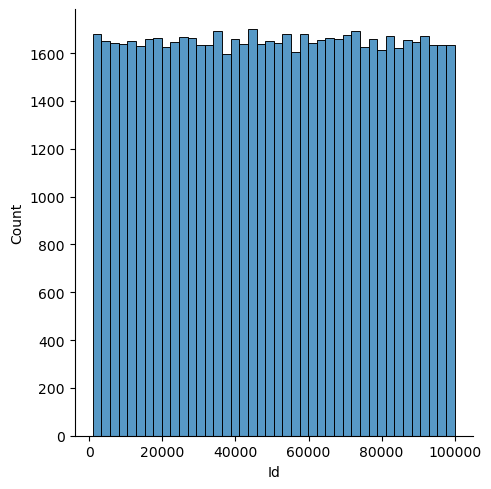

In [21]:
sns.displot(dataframe.Id);

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


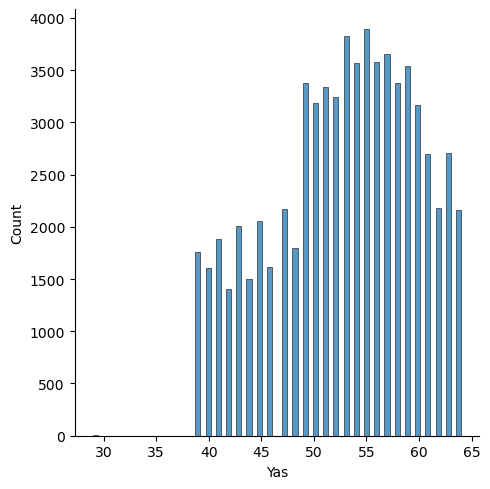

In [22]:
sns.displot(dataframe.Yas);

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


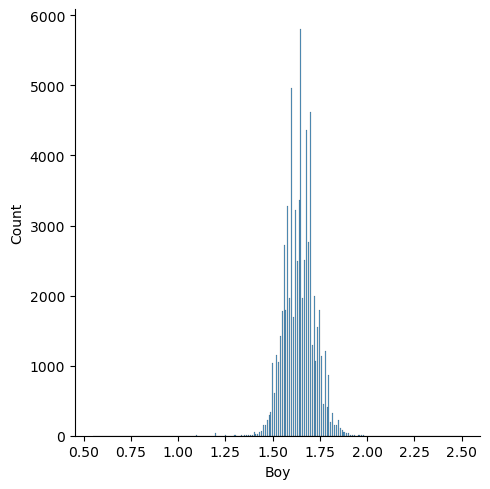

In [23]:
sns.displot(dataframe.Boy);

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


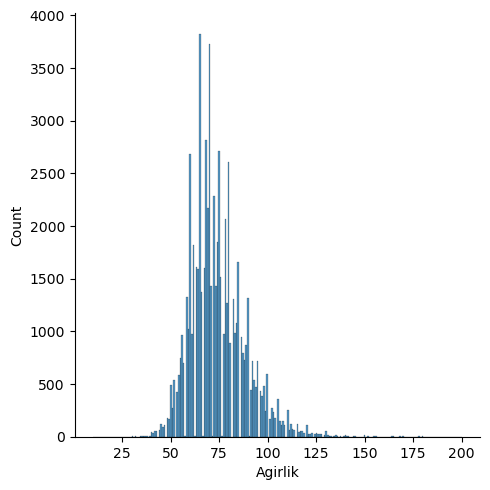

In [24]:
sns.displot(dataframe.Agirlik);

(-50.0, 300.0)

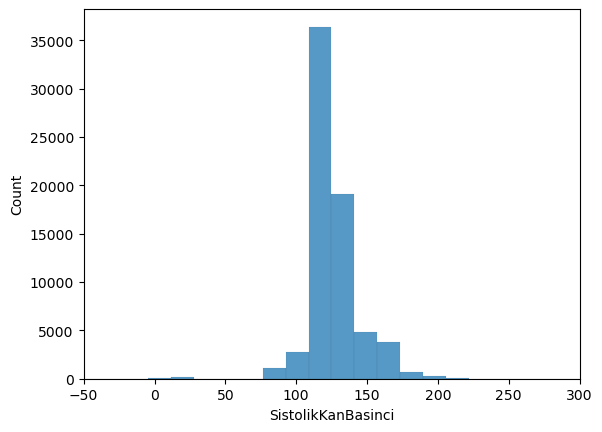

In [25]:
import matplotlib.pyplot as plt 
sns.histplot(dataframe.SistolikKanBasinci,bins=1000);
plt.xlim(-50, 300)

(-100.0, 300.0)

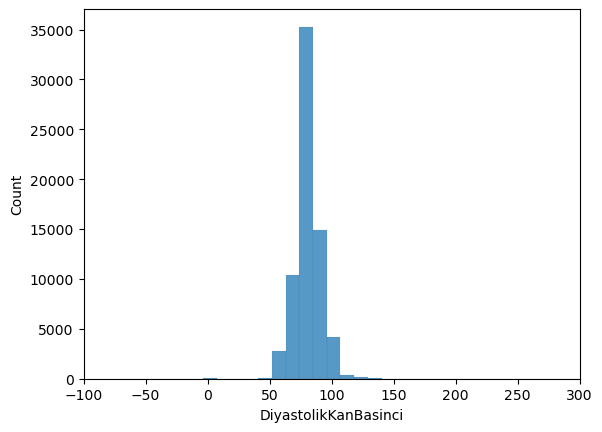

In [26]:
sns.histplot(dataframe.DiyastolikKanBasinci,bins=1000);
plt.xlim(-100, 300)

(0.0, 60.0)

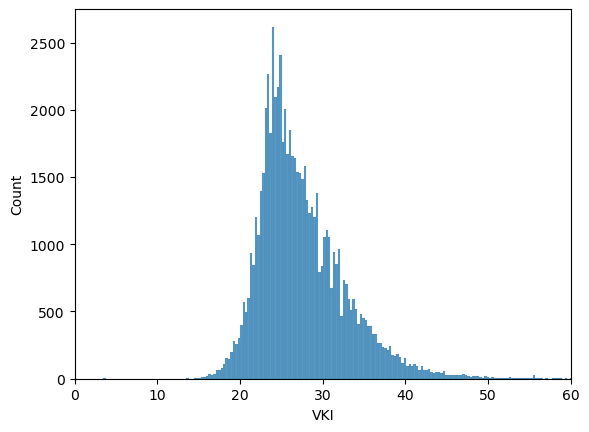

In [27]:
sns.histplot(dataframe.VKI,bins=1000);
plt.xlim(0, 60)

# KATEGORİK DEĞİŞKENELER

In [28]:
# Sayısal değişkenleri seçme
category_columns = dataframe.select_dtypes(include ='category').columns

# Sayısal değişken sayısını yazdırma
num_category_columns = len(category_columns)
print(f"Kategorik değişken sayısı: {num_category_columns}")

Kategorik değişken sayısı: 7


In [29]:
# Kategorik değişkenin sınıf sayısı
num_classes = dataframe['Cinsiyet'].nunique()
print("Kategorik Değişkenin Sınıf Sayısı:", num_classes)

Kategorik Değişkenin Sınıf Sayısı: 2


In [30]:
dataframe["Cinsiyet"].value_counts()

Cinsiyet
Kadin    45079
Erkek    24222
Name: count, dtype: int64

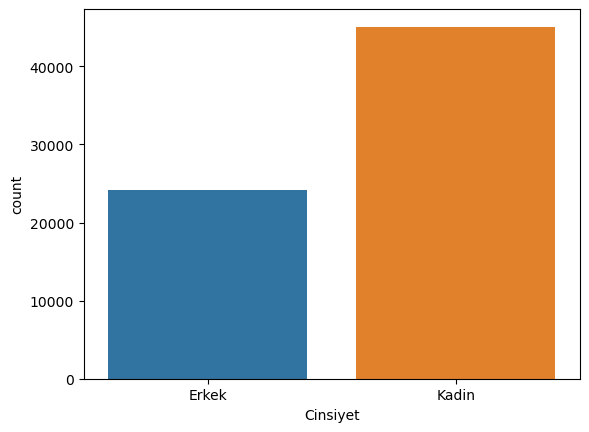

In [31]:
#Kategorik değişkenin freansı
sns.barplot(x = dataframe.Cinsiyet.value_counts().index, y = dataframe.Cinsiyet.value_counts(), data = dataframe); 

In [32]:
# Kategorik değişkenin sınıf sayısı
num_classes = dataframe['Kolestrol'].nunique()
print("Kategorik Değişkenin Sınıf Sayısı:", num_classes)

Kategorik Değişkenin Sınıf Sayısı: 3


In [33]:
dataframe["Kolestrol"].value_counts()

Kolestrol
1    51860
2     9444
3     7987
Name: count, dtype: int64

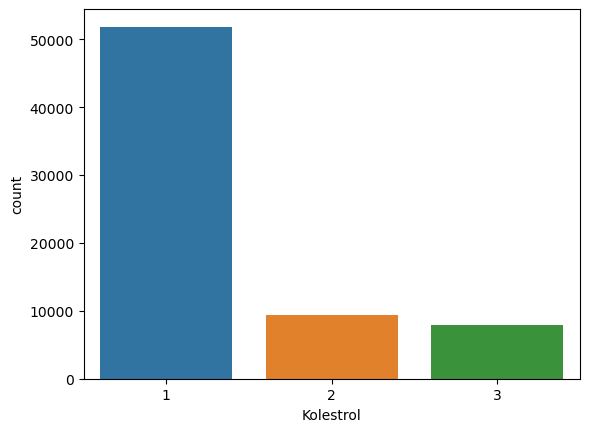

In [34]:
#Kategorik değişkenin freansı
sns.barplot(x = dataframe.Kolestrol.value_counts().index, y = dataframe.Kolestrol.value_counts(), data = dataframe); 

In [35]:
# Kategorik değişkenin sınıf sayısı
num_classes = dataframe['Glikoz'].nunique()
print("Kategorik Değişkenin Sınıf Sayısı:", num_classes)

Kategorik Değişkenin Sınıf Sayısı: 3


In [36]:
dataframe["Glikoz"].value_counts()

Glikoz
1    58885
3     5277
2     5139
Name: count, dtype: int64

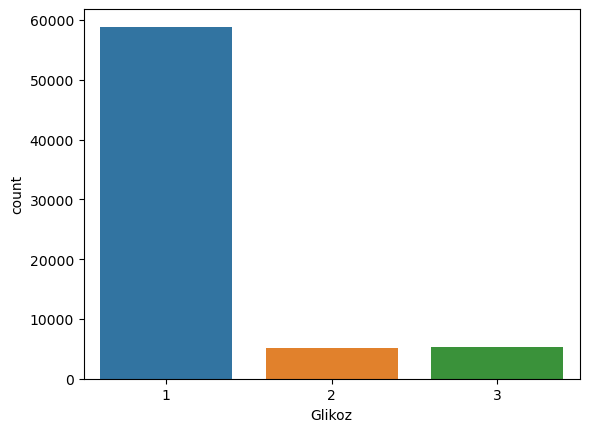

In [37]:
#Kategorik değişkenin freansı
sns.barplot(x = dataframe.Glikoz.value_counts().index, y = dataframe.Glikoz.value_counts(), data = dataframe); 

In [38]:
# Kategorik değişkenin sınıf sayısı
num_classes = dataframe['Sigara'].nunique()
print("Kategorik Değişkenin Sınıf Sayısı:", num_classes)

Kategorik Değişkenin Sınıf Sayısı: 2


In [39]:
dataframe["Sigara"].value_counts()

Sigara
Hayir    63199
Evet      6102
Name: count, dtype: int64

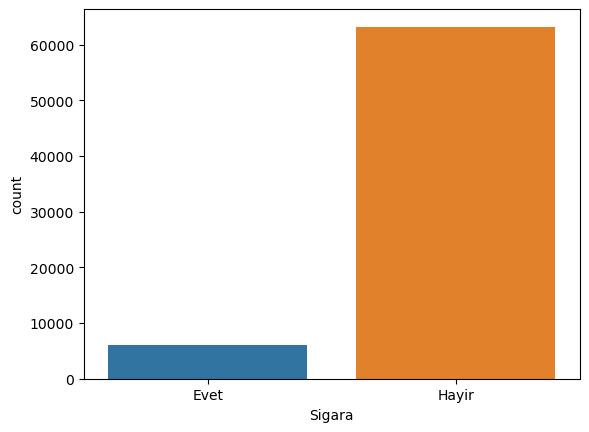

In [40]:
#Kategorik değişkenin freansı
sns.barplot(x = dataframe.Sigara.value_counts().index, y = dataframe.Sigara.value_counts(), data = dataframe); 

In [41]:
# Kategorik değişkenin sınıf sayısı
num_classes = dataframe['Alkol'].nunique()
print("Kategorik Değişkenin Sınıf Sayısı:", num_classes)

Kategorik Değişkenin Sınıf Sayısı: 2


In [42]:
dataframe["Alkol"].value_counts()

Alkol
Hayir    65567
Evet      3734
Name: count, dtype: int64

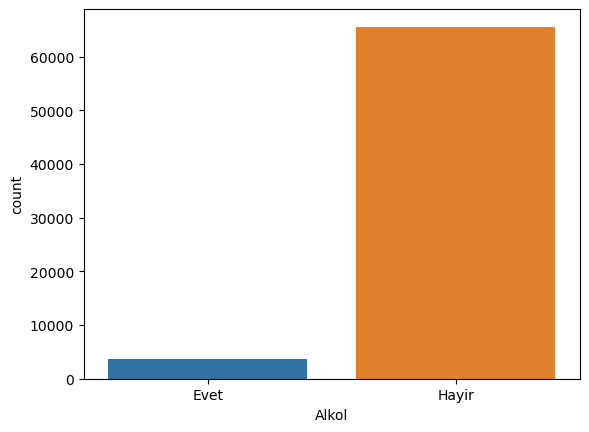

In [43]:
#Kategorik değişkenin freansı
sns.barplot(x = dataframe.Alkol.value_counts().index, y = dataframe.Alkol.value_counts(), data = dataframe); 

In [44]:
# Kategorik değişkenin sınıf sayısı
num_classes = dataframe['FizikselAktivite'].nunique()
print("Kategorik Değişkenin Sınıf Sayısı:", num_classes)

Kategorik Değişkenin Sınıf Sayısı: 2


In [45]:
dataframe["FizikselAktivite"].value_counts()

FizikselAktivite
Aktif    55709
Pasif    13581
Name: count, dtype: int64

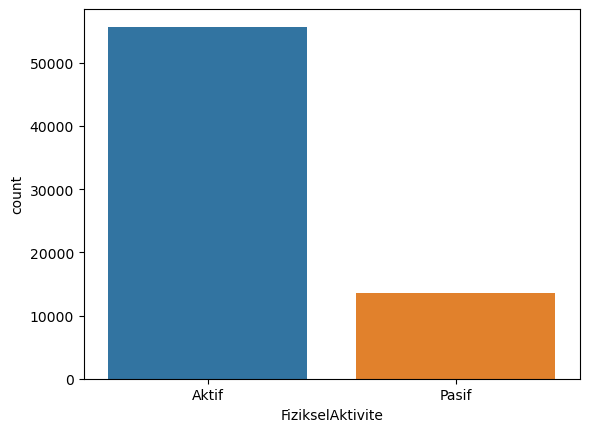

In [46]:
#Kategorik değişkenin freansı
sns.barplot(x = dataframe.FizikselAktivite.value_counts().index, y = dataframe.FizikselAktivite.value_counts(), data = dataframe); 

In [47]:
# Kategorik değişkenin sınıf sayısı
num_classes = dataframe['KardiyoVasküler'].nunique()
print("Kategorik Değişkenin Sınıf Sayısı:", num_classes)

Kategorik Değişkenin Sınıf Sayısı: 2


In [48]:
dataframe["KardiyoVasküler"].value_counts()

KardiyoVasküler
Hayir    34679
Evet     34622
Name: count, dtype: int64

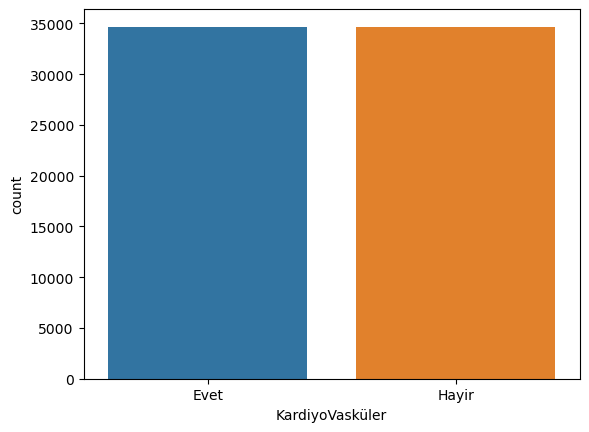

In [49]:
#Kategorik değişkenin freansı
sns.barplot(x = dataframe.KardiyoVasküler.value_counts().index, y = dataframe.KardiyoVasküler.value_counts(), data = dataframe); 

# ÇAPRAZLAMALAR

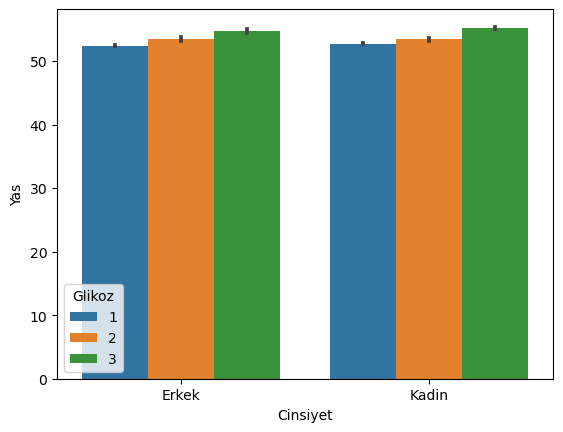

In [50]:
sns.barplot(x = "Cinsiyet", y = "Yas", hue = "Glikoz", data = dataframe);

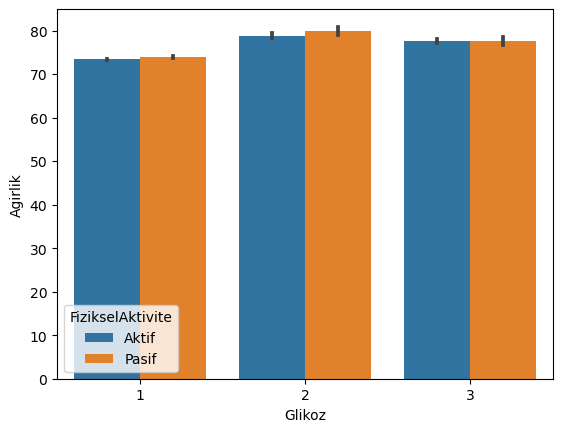

In [51]:
sns.barplot(x = "Glikoz", y = "Agirlik", hue = "FizikselAktivite", data = dataframe);

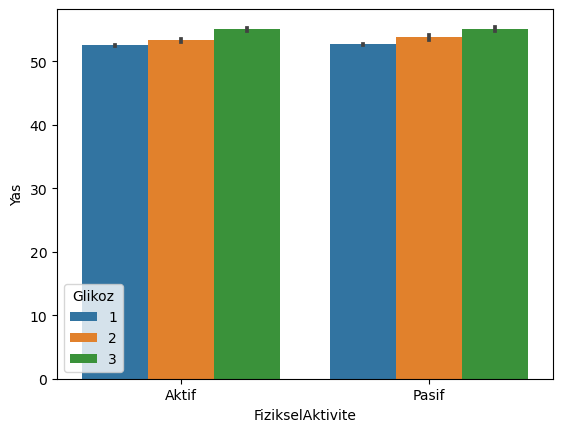

In [52]:
sns.barplot(x = "FizikselAktivite", y = "Yas", hue = "Glikoz", data = dataframe);

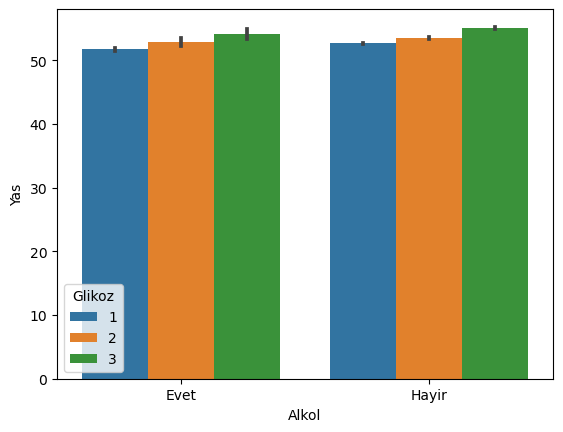

In [53]:
sns.barplot(x = "Alkol", y = "Yas", hue = "Glikoz", data = dataframe);

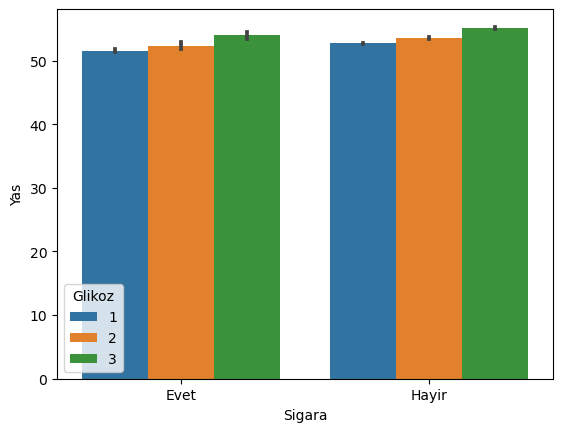

In [54]:
sns.barplot(x = "Sigara", y = "Yas", hue = "Glikoz", data = dataframe);

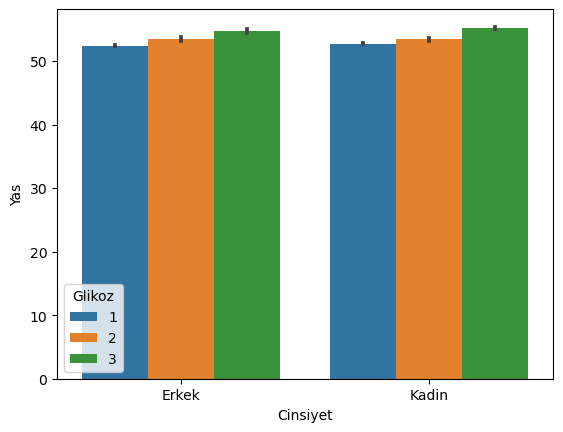

In [55]:
sns.barplot(x = "Cinsiyet", y = "Yas", hue = "Glikoz", data = dataframe);

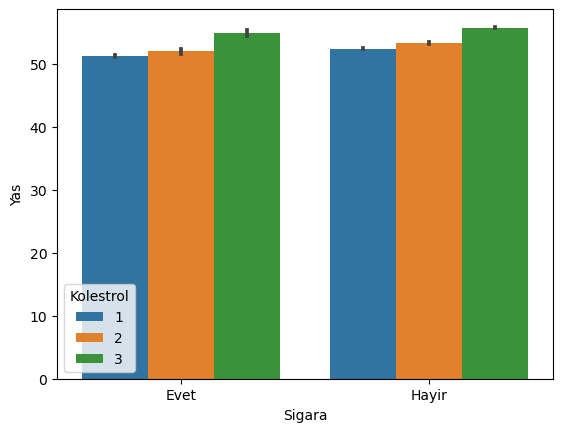

In [56]:
sns.barplot(x = "Sigara", y = "Yas", hue = "Kolestrol", data = dataframe);

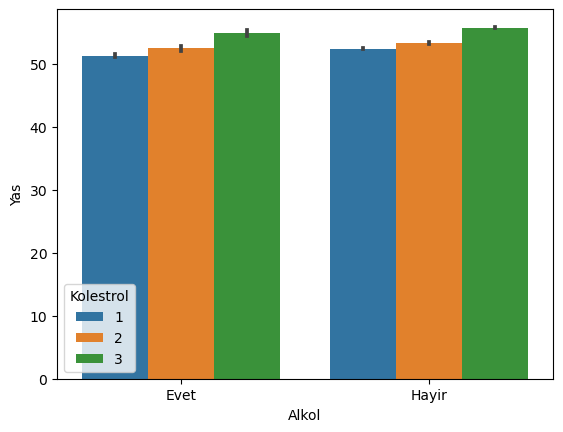

In [57]:
sns.barplot(x = "Alkol", y = "Yas", hue = "Kolestrol", data = dataframe);

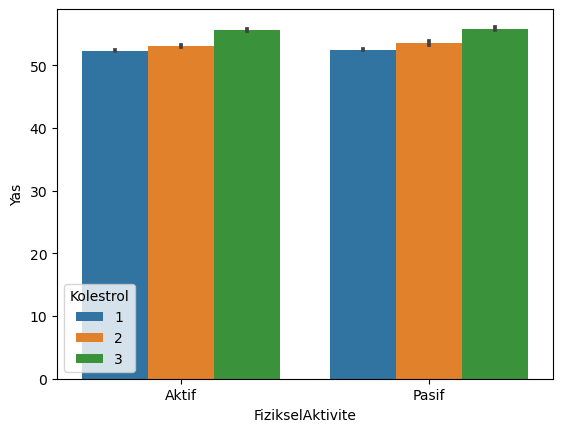

In [58]:
sns.barplot(x = "FizikselAktivite", y = "Yas", hue = "Kolestrol", data = dataframe);

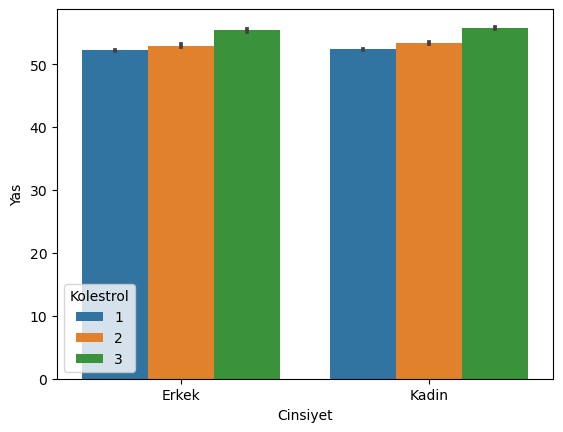

In [59]:
sns.barplot(x = "Cinsiyet", y = "Yas", hue = "Kolestrol", data = dataframe);

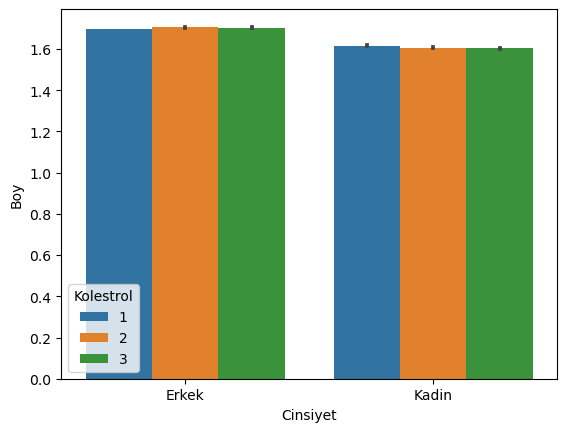

In [60]:
sns.barplot(x = "Cinsiyet", y = "Boy", hue = "Kolestrol", data = dataframe);

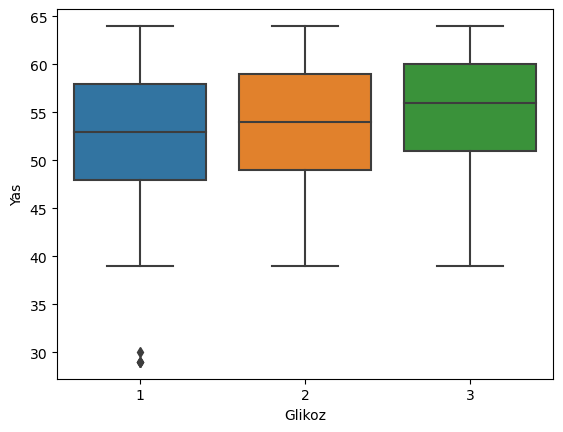

In [61]:
sns.boxplot(x = "Glikoz", y = "Yas", data = dataframe);

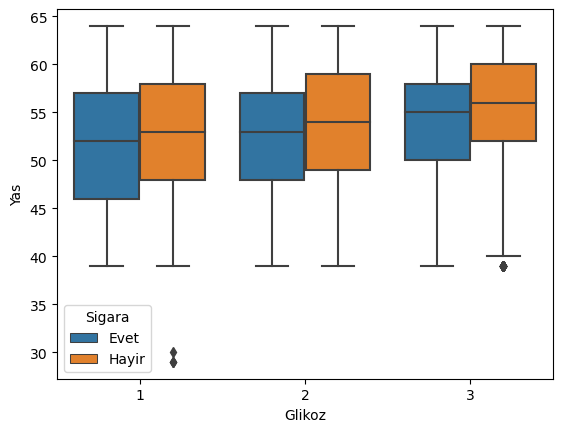

In [62]:
sns.boxplot(x = "Glikoz", y = "Yas", hue = "Sigara", data = dataframe);

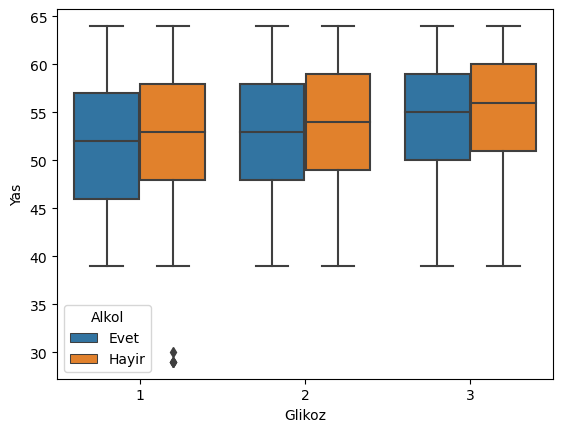

In [63]:
sns.boxplot(x = "Glikoz", y = "Yas", hue = "Alkol", data = dataframe);

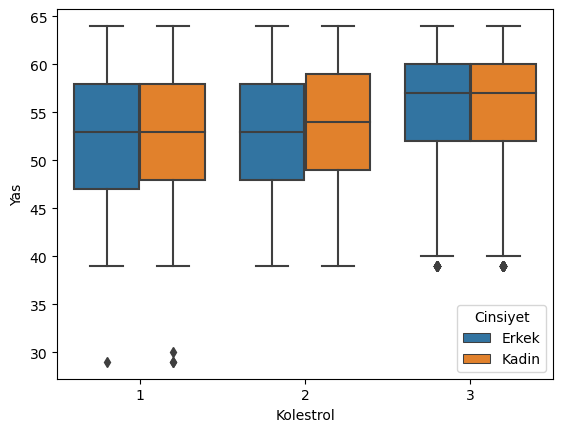

In [64]:
sns.boxplot(x = "Kolestrol", y = "Yas", hue = "Cinsiyet", data = dataframe);

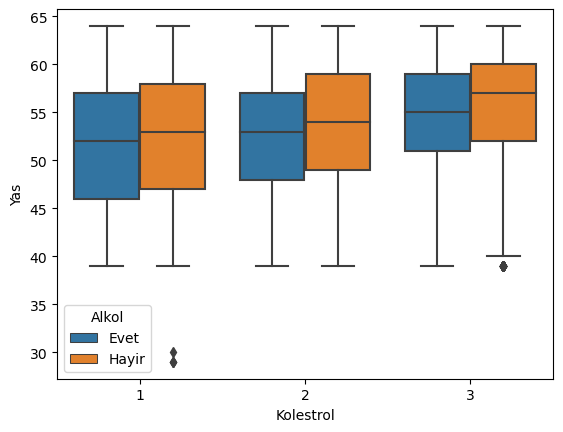

In [65]:
sns.boxplot(x = "Kolestrol", y = "Yas", hue = "Alkol", data = dataframe);

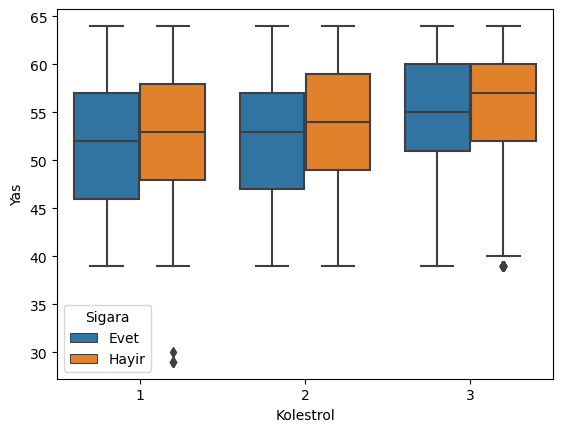

In [66]:
sns.boxplot(x = "Kolestrol", y = "Yas", hue = "Sigara", data = dataframe);

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


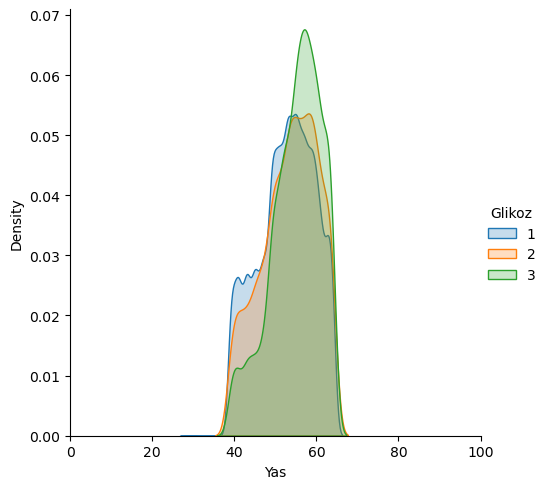

In [67]:
(sns
 .FacetGrid(dataframe,
              hue = "Glikoz",
              height = 5,
              xlim = (0, 100)) # x ekseni 0 ile 100 arası olsun bu aralıktaki değişime odaklanmak isteyelim
 .map(sns.kdeplot, "Yas", fill= True).add_legend()
);

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


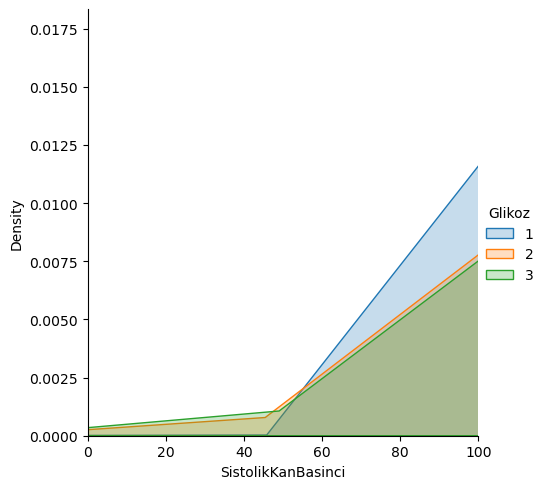

In [68]:
(sns
 .FacetGrid(dataframe,
              hue = "Glikoz",
              height = 5,
              xlim = (0, 100)) # x ekseni 0 ile 100000 arası olsun bu aralıktaki değişime odaklanmak isteyelim
 .map(sns.kdeplot, "SistolikKanBasinci", fill= True).add_legend()
);

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


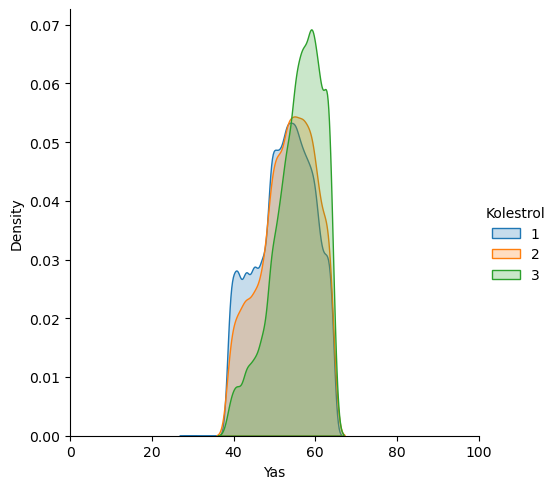

In [69]:
(sns
 .FacetGrid(dataframe,
              hue = "Kolestrol",
              height = 5,
              xlim = (0, 100)) # x ekseni 0 ile 100000 arası olsun bu aralıktaki değişime odaklanmak isteyelim
 .map(sns.kdeplot, "Yas", fill= True).add_legend()
);

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


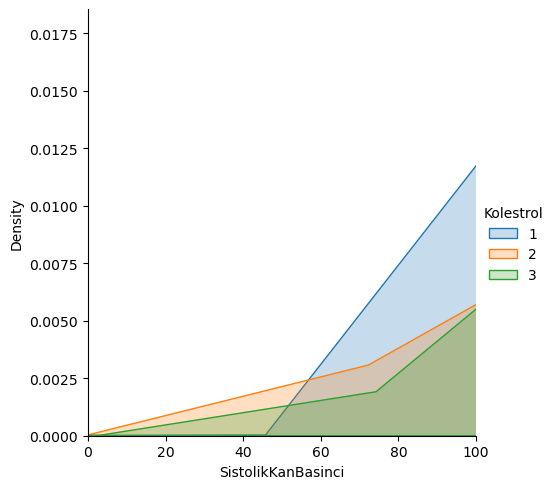

In [70]:
(sns
 .FacetGrid(dataframe,
              hue = "Kolestrol",
              height = 5,
              xlim = (0, 100)) # x ekseni 0 ile 100000 arası olsun bu aralıktaki değişime odaklanmak isteyelim
 .map(sns.kdeplot, "SistolikKanBasinci", fill= True).add_legend()
);

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


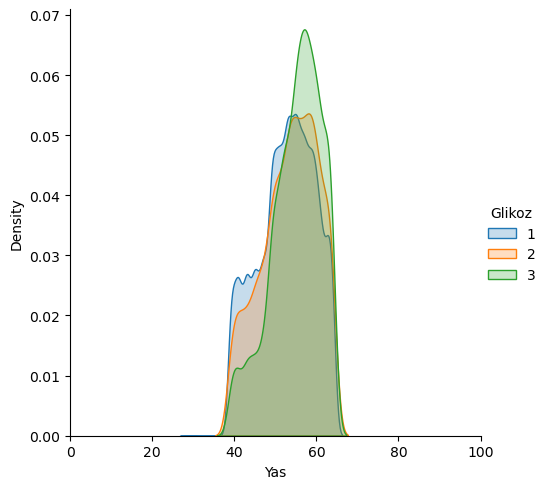

In [71]:
(sns
 .FacetGrid(dataframe,
              hue = "Glikoz",
              height = 5,
              xlim = (0, 100)) # x ekseni 0 ile 100000 arası olsun bu aralıktaki değişime odaklanmak isteyelim
 .map(sns.kdeplot, "Yas", fill= True).add_legend()
);

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


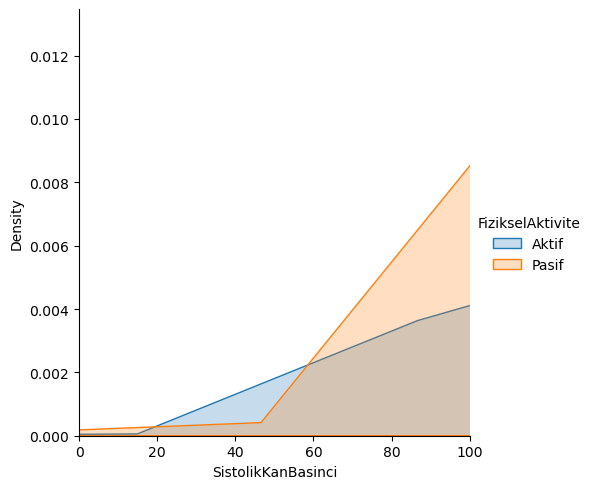

In [72]:
(sns
 .FacetGrid(dataframe,
              hue = "FizikselAktivite",
              height = 5,
              xlim = (0, 100)) # x ekseni 0 ile 100000 arası olsun bu aralıktaki değişime odaklanmak isteyelim
 .map(sns.kdeplot, "SistolikKanBasinci", fill= True).add_legend()
);

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


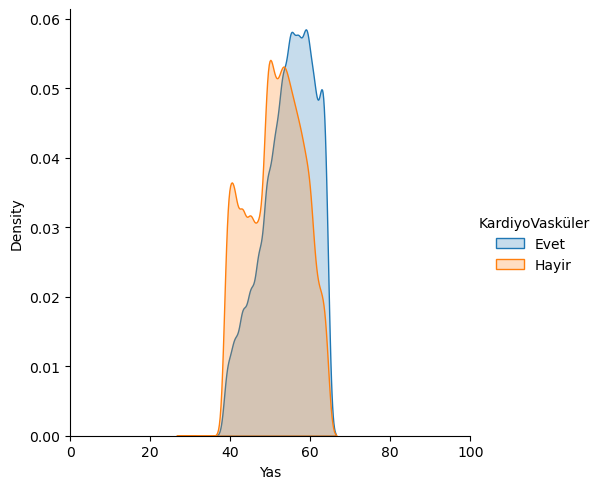

In [73]:
(sns
 .FacetGrid(dataframe,
              hue = "KardiyoVasküler",
              height = 5,
              xlim = (0, 100)) # x ekseni 0 ile 100000 arası olsun bu aralıktaki değişime odaklanmak isteyelim
 .map(sns.kdeplot, "Yas", fill= True).add_legend()
);

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


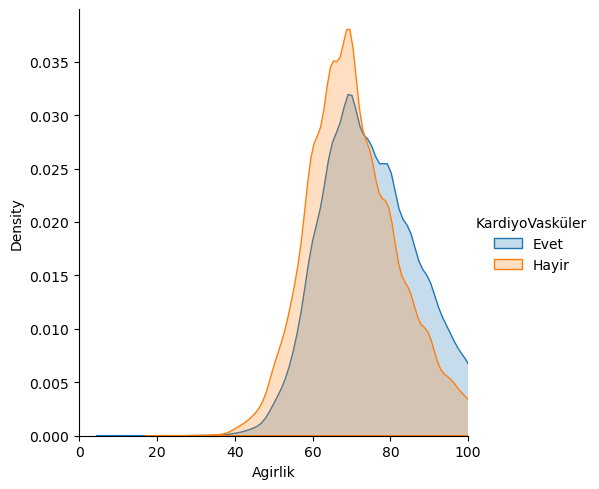

In [74]:
(sns
 .FacetGrid(dataframe,
              hue = "KardiyoVasküler",
              height = 5,
              xlim = (0, 100)) # x ekseni 0 ile 100000 arası olsun bu aralıktaki değişime odaklanmak isteyelim
 .map(sns.kdeplot, "Agirlik", fill= True).add_legend()
);

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


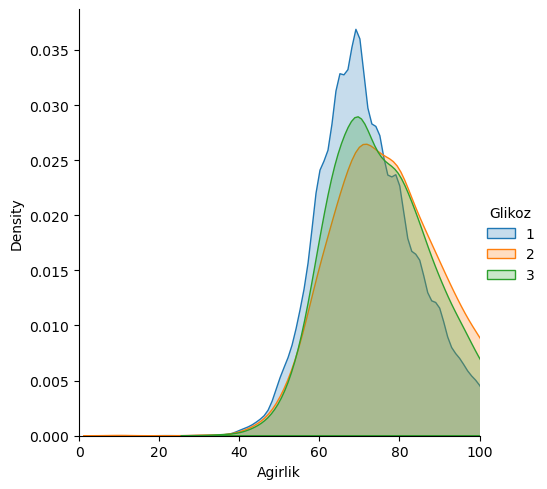

In [75]:
(sns
 .FacetGrid(dataframe,
              hue = "Glikoz",
              height = 5,
              xlim = (0, 100)) # x ekseni 0 ile 100000 arası olsun bu aralıktaki değişime odaklanmak isteyelim
 .map(sns.kdeplot, "Agirlik", fill= True).add_legend()
);

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


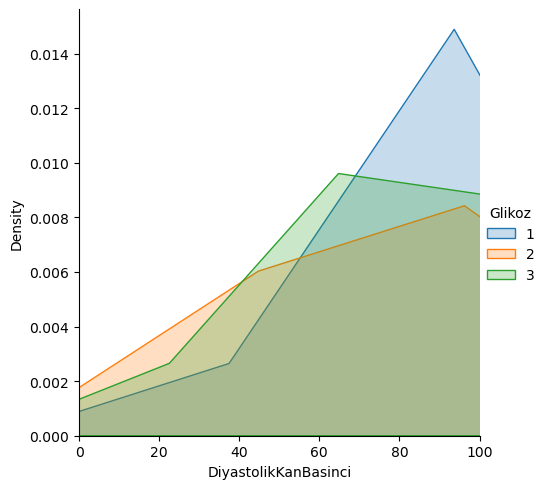

In [76]:
(sns
 .FacetGrid(dataframe,
              hue = "Glikoz",
              height = 5,
              xlim = (0, 100)) # x ekseni 0 ile 100000 arası olsun bu aralıktaki değişime odaklanmak isteyelim
 .map(sns.kdeplot, "DiyastolikKanBasinci", fill= True).add_legend()
);

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


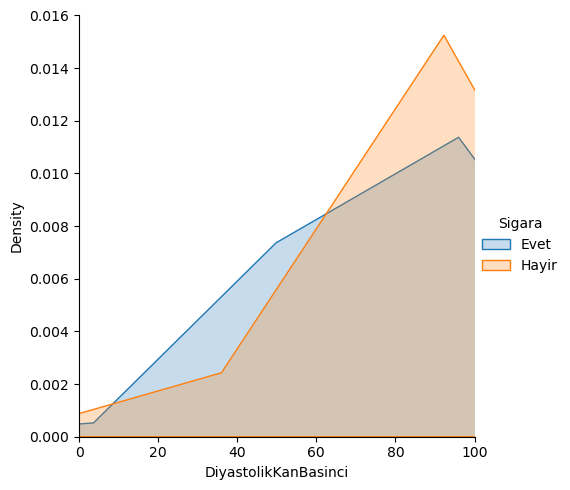

In [77]:
(sns
 .FacetGrid(dataframe,
              hue = "Sigara",
              height = 5,
              xlim = (0, 100)) # x ekseni 0 ile 100000 arası olsun bu aralıktaki değişime odaklanmak isteyelim
 .map(sns.kdeplot, "DiyastolikKanBasinci", fill= True).add_legend()
);

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


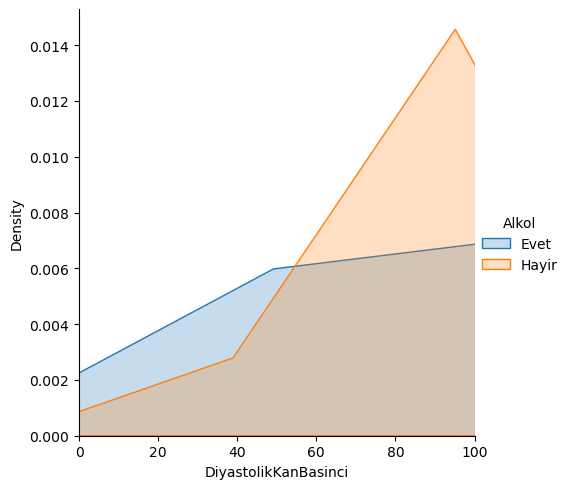

In [78]:
(sns
 .FacetGrid(dataframe,
              hue = "Alkol",
              height = 5,
              xlim = (0, 100)) # x ekseni 0 ile 100000 arası olsun bu aralıktaki değişime odaklanmak isteyelim
 .map(sns.kdeplot, "DiyastolikKanBasinci", fill= True).add_legend()
);

In [79]:
dataframe

,Id,Yas,Cinsiyet,Boy,Agirlik,SistolikKanBasinci,DiyastolikKanBasinci,Kolestrol,Glikoz,Sigara,Alkol,FizikselAktivite,KardiyoVasküler,VKI
0,988,61,Kadin,1.55,69.0,130.0,80,NaN,2,Hayir,Hayir,Aktif,Hayir,28.720083
1,989,40,Kadin,1.63,71.0,110.0,70,1,1,Hayir,Hayir,Aktif,Evet,26.722873
2,990,60,Kadin,1.65,70.0,120.0,80,1,1,Hayir,Hayir,Aktif,Hayir,25.711662
3,991,39,Erkek,1.65,85.0,120.0,80,1,1,Evet,Evet,Aktif,Hayir,31.221304
4,992,64,Kadin,1.55,62.0,120.0,80,1,1,Hayir,Hayir,Aktif,Hayir,25.806452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,52,Erkek,1.68,76.0,120.0,80,1,1,Evet,Hayir,Aktif,Hayir,26.927438
69297,99995,61,Kadin,1.58,126.0,140.0,90,2,2,Hayir,Hayir,Aktif,Evet,50.472681
69298,99996,52,Erkek,1.83,105.0,180.0,90,3,1,Hayir,Evet,Pasif,Evet,31.353579
69299,99998,61,Kadin,1.63,72.0,135.0,80,NaN,2,Hayir,Hayir,Pasif,Evet,27.099251


# Aykırı Değer Probleminin Çözümü

In [80]:
# DataFrame'i CSV dosyasına kaydet
dataframe.to_csv('cardio_organized.csv', index=False)

In [81]:
df = dataframe.select_dtypes(include = ['float64','int64']) #sadece sayısal değişkenlere erişiyoruz
df = df.dropna() #eksik gözlemleri görmezden gelerek aykırı değerleri tespit edelim
df.head()


,Yas,Boy,Agirlik,SistolikKanBasinci,DiyastolikKanBasinci,VKI
0,61,1.55,69.0,130.0,80,28.720083
1,40,1.63,71.0,110.0,70,26.722873
2,60,1.65,70.0,120.0,80,25.711662
3,39,1.65,85.0,120.0,80,31.221304
4,64,1.55,62.0,120.0,80,25.806452


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69287 entries, 0 to 69299
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Yas                   69287 non-null  int64  
 1   Boy                   69287 non-null  float64
 2   Agirlik               69287 non-null  float64
 3   SistolikKanBasinci    69287 non-null  float64
 4   DiyastolikKanBasinci  69287 non-null  int64  
 5   VKI                   69287 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 3.7 MB


In [83]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor # LocalOutlierFactor fonksiyonunu import ediyoruz

In [84]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1) #komşu ve yoğunluğu ifade eden parametrelere değerleri giriyoruz

In [85]:
clf.fit_predict(df) #bu faktör değerlerini df üzerine uygula. Elimizde herbir gözlem değerine ait skorlar olacak.

array([ 1,  1,  1, ...,  1,  1, -1])

In [86]:
df_scores = clf.negative_outlier_factor_ #bu skorları kaydettik

In [87]:
df_scores[0:10]

array([-0.99252203, -1.02020236, -0.99124998, -1.05752231, -1.19893976,
       -0.98667866, -0.98300875, -0.99079204, -1.01491133, -1.13063748])

In [88]:
np.sort(df_scores)[0:100] #sıralama yap sonra ilk 20 veriyi göster

array([-2.46885575e+10, -2.39956581e+10, -2.00000000e+10, -2.00000000e+10,
       -1.93897752e+10, -1.91121323e+10, -1.68280494e+10, -8.62719857e+09,
       -8.50000000e+09, -8.50000000e+09, -8.50000000e+09, -8.00000000e+09,
       -7.51361687e+09, -7.51361687e+09, -7.50000000e+09, -7.00000000e+09,
       -6.66682720e+09, -6.66682720e+09, -6.57719311e+09, -6.57719311e+09,
       -6.57672133e+09, -6.18894024e+09, -6.18894024e+09, -6.17290936e+09,
       -6.17290936e+09, -6.17290936e+09, -6.17290936e+09, -6.13650483e+09,
       -6.06562453e+09, -6.06562453e+09, -6.06562453e+09, -6.06562453e+09,
       -6.00000000e+09, -6.00000000e+09, -6.00000000e+09, -6.00000000e+09,
       -6.00000000e+09, -6.00000000e+09, -6.00000000e+09, -6.00000000e+09,
       -5.74733338e+09, -5.22951667e+09, -5.21373367e+09, -5.14055292e+09,
       -5.11068557e+09, -4.97320397e+09, -4.96236663e+09, -4.88932803e+09,
       -4.88932803e+09, -4.88932803e+09, -4.83083657e+09, -4.69512702e+09,
       -4.63058164e+09, -

In [89]:
esik_deger = np.sort(df_scores)[7] #rastgele bir skoru eşik değeri olarak belirleyelim

In [90]:
esik_deger

-8627198572.661325

In [91]:
aykiri_olmayan_tf = df_scores > esik_deger

In [92]:
aykiri_olmayan_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [93]:
baski_deger = df[df_scores == esik_deger]

In [94]:
baski_deger

,Yas,Boy,Agirlik,SistolikKanBasinci,DiyastolikKanBasinci,VKI
32574,49,1.64,64.0,122.0,80,23.79536


In [95]:
aykirilar = df[~aykiri_olmayan_tf]

In [96]:
aykirilar

,Yas,Boy,Agirlik,SistolikKanBasinci,DiyastolikKanBasinci,VKI
8922,57,1.64,65.0,115.0,80,24.167162
9082,59,1.65,65.0,120.0,82,23.875115
24319,60,1.65,65.0,115.0,80,23.875115
31252,52,1.64,65.0,120.0,85,24.167162
32574,49,1.64,64.0,122.0,80,23.795360
33706,49,1.65,65.0,120.0,82,23.875115
49075,57,1.60,60.0,122.0,80,23.437500
63650,60,1.66,65.0,115.0,80,23.588329


In [97]:
aykirilar.to_records(index = False) #arraye çevirip indekslerden kurtulduk

rec.array([(57, 1.64, 65., 115., 80, 24.1671624 ),
           (59, 1.65, 65., 120., 82, 23.87511478),
           (60, 1.65, 65., 115., 80, 23.87511478),
           (52, 1.64, 65., 120., 85, 24.1671624 ),
           (49, 1.64, 64., 122., 80, 23.7953599 ),
           (49, 1.65, 65., 120., 82, 23.87511478),
           (57, 1.6 , 60., 122., 80, 23.4375    ),
           (60, 1.66, 65., 115., 80, 23.58832922)],
          dtype=[('Yas', '<i8'), ('Boy', '<f8'), ('Agirlik', '<f8'), ('SistolikKanBasinci', '<f8'), ('DiyastolikKanBasinci', '<i8'), ('VKI', '<f8')])

In [98]:
res = aykirilar.to_records(index = False)

In [99]:
res[:] = baski_deger.to_records(index = False) #resler yerine baskı değerleri gelmiş oldu

In [100]:
res

rec.array([(49, 1.64, 64., 122., 80, 23.7953599),
           (49, 1.64, 64., 122., 80, 23.7953599),
           (49, 1.64, 64., 122., 80, 23.7953599),
           (49, 1.64, 64., 122., 80, 23.7953599),
           (49, 1.64, 64., 122., 80, 23.7953599),
           (49, 1.64, 64., 122., 80, 23.7953599),
           (49, 1.64, 64., 122., 80, 23.7953599),
           (49, 1.64, 64., 122., 80, 23.7953599)],
          dtype=[('Yas', '<i8'), ('Boy', '<f8'), ('Agirlik', '<f8'), ('SistolikKanBasinci', '<f8'), ('DiyastolikKanBasinci', '<i8'), ('VKI', '<f8')])

In [101]:
type(res)

numpy.recarray

In [102]:
df[~aykiri_olmayan_tf]

,Yas,Boy,Agirlik,SistolikKanBasinci,DiyastolikKanBasinci,VKI
8922,57,1.64,65.0,115.0,80,24.167162
9082,59,1.65,65.0,120.0,82,23.875115
24319,60,1.65,65.0,115.0,80,23.875115
31252,52,1.64,65.0,120.0,85,24.167162
32574,49,1.64,64.0,122.0,80,23.795360
33706,49,1.65,65.0,120.0,82,23.875115
49075,57,1.60,60.0,122.0,80,23.437500
63650,60,1.66,65.0,115.0,80,23.588329


In [103]:
import pandas as pd
df[~aykiri_olmayan_tf] = pd.DataFrame(res, index = df[~aykiri_olmayan_tf].index)#resleri dataframe'e çevir ve aykırı değerlerin yerine ata, index değerlerini aykırı değerlerin indeksi olarak kendimiz belirliyoruz

In [104]:
df[~aykiri_olmayan_tf]

,Yas,Boy,Agirlik,SistolikKanBasinci,DiyastolikKanBasinci,VKI
8922,49,1.64,64.0,122.0,80,23.79536
9082,49,1.64,64.0,122.0,80,23.79536
24319,49,1.64,64.0,122.0,80,23.79536
31252,49,1.64,64.0,122.0,80,23.79536
32574,49,1.64,64.0,122.0,80,23.79536
33706,49,1.64,64.0,122.0,80,23.79536
49075,49,1.64,64.0,122.0,80,23.79536
63650,49,1.64,64.0,122.0,80,23.79536


In [105]:
aykirilar.index

Index([8922, 9082, 24319, 31252, 32574, 33706, 49075, 63650], dtype='int64')

In [106]:
dataframe.loc[aykirilar.index, ('Yas', 'Boy', 'Agirlik', 'SistolikKanBasinci', 'DiyastolikKanBasinci', 'VKI')]=df[~aykiri_olmayan_tf]

In [107]:
dataframe.loc[0:33706,:]

,Id,Yas,Cinsiyet,Boy,Agirlik,SistolikKanBasinci,DiyastolikKanBasinci,Kolestrol,Glikoz,Sigara,Alkol,FizikselAktivite,KardiyoVasküler,VKI
0,988,61,Kadin,1.55,69.0,130.0,80,NaN,2,Hayir,Hayir,Aktif,Hayir,28.720083
1,989,40,Kadin,1.63,71.0,110.0,70,1,1,Hayir,Hayir,Aktif,Evet,26.722873
2,990,60,Kadin,1.65,70.0,120.0,80,1,1,Hayir,Hayir,Aktif,Hayir,25.711662
3,991,39,Erkek,1.65,85.0,120.0,80,1,1,Evet,Evet,Aktif,Hayir,31.221304
4,992,64,Kadin,1.55,62.0,120.0,80,1,1,Hayir,Hayir,Aktif,Hayir,25.806452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33702,49154,55,Erkek,1.75,75.0,140.0,80,1,1,Hayir,Hayir,Aktif,Evet,24.489796
33703,49155,47,Kadin,1.60,76.0,120.0,80,1,1,Hayir,Hayir,Aktif,Evet,29.687500
33704,49157,61,Kadin,1.68,90.0,140.0,90,1,1,Hayir,Hayir,Aktif,Evet,31.887755
33705,49158,55,Kadin,1.67,84.0,150.0,90,3,1,Hayir,Hayir,Aktif,Evet,30.119402


In [108]:
# DataFrame'i CSV dosyasına yazdırma
dataframe.to_csv('veriseti.csv', index=False)

In [109]:
df = pd.read_csv('veriseti.csv')

In [110]:
list(df)

['Id',
 'Yas',
 'Cinsiyet',
 'Boy',
 'Agirlik',
 'SistolikKanBasinci',
 'DiyastolikKanBasinci',
 'Kolestrol',
 'Glikoz',
 'Sigara',
 'Alkol',
 'FizikselAktivite',
 'KardiyoVasküler',
 'VKI']

# Eksik Veri Probleminin Çözümü

### Kategorik Değişken Kırılımında Değer Atama

In [111]:
# Tüm "object" türündeki sütunları "category" türe dönüştür
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [112]:
from pandas.api.types import CategoricalDtype 

kolestrol_kategoriler = [1,2,3]
df.Kolestrol = df.Kolestrol.astype(CategoricalDtype(categories = kolestrol_kategoriler, ordered = True))

glikoz_kategoriler = [1,2,3]
df.Glikoz = df.Glikoz.astype(CategoricalDtype(categories = glikoz_kategoriler, ordered = True))

In [113]:


df['Yas'] = df['Yas'].astype('int64')

df['Id'] = df['Id'].astype('int32')


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Id                    69301 non-null  int32   
 1   Yas                   69301 non-null  int64   
 2   Cinsiyet              69301 non-null  category
 3   Boy                   69301 non-null  float64 
 4   Agirlik               69293 non-null  float64 
 5   SistolikKanBasinci    69295 non-null  float64 
 6   DiyastolikKanBasinci  69301 non-null  int64   
 7   Kolestrol             69291 non-null  category
 8   Glikoz                69301 non-null  category
 9   Sigara                69301 non-null  category
 10  Alkol                 69301 non-null  category
 11  FizikselAktivite      69290 non-null  category
 12  KardiyoVasküler       69301 non-null  category
 13  VKI                   69293 non-null  float64 
dtypes: category(7), float64(4), int32(1), int64(2)
memory 

In [115]:
df.isnull().sum()  #değişken başına eksik değer sayısı

Id                       0
Yas                      0
Cinsiyet                 0
Boy                      0
Agirlik                  8
SistolikKanBasinci       6
DiyastolikKanBasinci     0
Kolestrol               10
Glikoz                   0
Sigara                   0
Alkol                    0
FizikselAktivite        11
KardiyoVasküler          0
VKI                      8
dtype: int64

In [116]:
df["SistolikKanBasinci"]=df["SistolikKanBasinci"].fillna(df.groupby("FizikselAktivite")["SistolikKanBasinci"].transform("mean"))#transform fonksiyonunu işlemiştik. Maas değişkenindeki eksik verileri departman kategorik değişkenlerindeki sınıflara göre ortalamalar ile doldur

In [117]:
df["SistolikKanBasinci"].isnull().sum() 

0

In [118]:
df["Agirlik"]=df["Agirlik"].fillna(df.groupby("Glikoz")["Agirlik"].transform("mean"))#transform fonksiyonunu işlemiştik. Maas değişkenindeki eksik verileri departman kategorik değişkenlerindeki sınıflara göre ortalamalar ile doldur

In [119]:
df["Agirlik"].isnull().sum() 

0

In [120]:
mask = (df["KardiyoVasküler"].astype(str) == "Evet") & df["Kolestrol"].isnull()
# Seçilen satırlardaki null değerleri ICU=1 olan grup içindeki en sık tekrar eden değerle doldur
# ICU=1 olan grup içindeki "Entube" sütunundaki mod değerini al
mode_value = df.loc[df["KardiyoVasküler"].astype(str) == "Evet", "Kolestrol"].mode().iloc[0]

In [121]:
df.loc[mask, "Kolestrol"] = mode_value

In [122]:
df["Kolestrol"].isnull().sum() 

4

In [123]:
df['Kolestrol']=df["Kolestrol"].fillna(df["Kolestrol"].mode()[0])

In [124]:
df["Kolestrol"].isnull().sum() 

0

In [125]:
df['VKI'].fillna((df['Agirlik'] / (df['Boy']) ** 2), inplace=True)

In [126]:
df["VKI"].isnull().sum() 

0

In [127]:
mask = (df["VKI"] >25) & df["FizikselAktivite"].isnull()
# Seçilen satırlardaki null değerleri ICU=1 olan grup içindeki en sık tekrar eden değerle doldur
# ICU=1 olan grup içindeki "Entube" sütunundaki mod değerini al
mode_value = df.loc[df["VKI"] > 25, "FizikselAktivite"].mode().iloc[0]

In [128]:
df.loc[mask, "FizikselAktivite"] = mode_value

In [129]:
df["FizikselAktivite"].isnull().sum() 

7

In [130]:
df["FizikselAktivite"]=df["FizikselAktivite"].fillna(df["FizikselAktivite"].mode()[0])

In [131]:
df["FizikselAktivite"].isnull().sum() 

0

In [132]:
df.isnull().sum()  #değişken başına eksik değer sayısı


Id                      0
Yas                     0
Cinsiyet                0
Boy                     0
Agirlik                 0
SistolikKanBasinci      0
DiyastolikKanBasinci    0
Kolestrol               0
Glikoz                  0
Sigara                  0
Alkol                   0
FizikselAktivite        0
KardiyoVasküler         0
VKI                     0
dtype: int64

In [133]:
df

,Id,Yas,Cinsiyet,Boy,Agirlik,SistolikKanBasinci,DiyastolikKanBasinci,Kolestrol,Glikoz,Sigara,Alkol,FizikselAktivite,KardiyoVasküler,VKI
0,988,61,Kadin,1.55,69.000000,130.0,80,1,2,Hayir,Hayir,Aktif,Hayir,28.720083
1,989,40,Kadin,1.63,71.000000,110.0,70,1,1,Hayir,Hayir,Aktif,Evet,26.722873
2,990,60,Kadin,1.65,70.000000,120.0,80,1,1,Hayir,Hayir,Aktif,Hayir,25.711662
3,991,39,Erkek,1.65,85.000000,120.0,80,1,1,Evet,Evet,Aktif,Hayir,31.221304
4,992,64,Kadin,1.55,62.000000,120.0,80,1,1,Hayir,Hayir,Aktif,Hayir,25.806452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,52,Erkek,1.68,76.000000,120.0,80,1,1,Evet,Hayir,Aktif,Hayir,26.927438
69297,99995,61,Kadin,1.58,126.000000,140.0,90,2,2,Hayir,Hayir,Aktif,Evet,50.472681
69298,99996,52,Erkek,1.83,105.000000,180.0,90,3,1,Hayir,Evet,Pasif,Evet,31.353579
69299,99998,61,Kadin,1.63,72.000000,135.0,80,1,2,Hayir,Hayir,Pasif,Evet,27.099251


In [134]:
# DataFrame'i CSV dosyasına kaydet
df.to_csv('veriseti_duzenli.csv', index=False)

In [135]:
df = pd.read_csv('veriseti_duzenli.csv')

In [136]:
df

,Id,Yas,Cinsiyet,Boy,Agirlik,SistolikKanBasinci,DiyastolikKanBasinci,Kolestrol,Glikoz,Sigara,Alkol,FizikselAktivite,KardiyoVasküler,VKI
0,988,61,Kadin,1.55,69.000000,130.0,80,1,2,Hayir,Hayir,Aktif,Hayir,28.720083
1,989,40,Kadin,1.63,71.000000,110.0,70,1,1,Hayir,Hayir,Aktif,Evet,26.722873
2,990,60,Kadin,1.65,70.000000,120.0,80,1,1,Hayir,Hayir,Aktif,Hayir,25.711662
3,991,39,Erkek,1.65,85.000000,120.0,80,1,1,Evet,Evet,Aktif,Hayir,31.221304
4,992,64,Kadin,1.55,62.000000,120.0,80,1,1,Hayir,Hayir,Aktif,Hayir,25.806452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,52,Erkek,1.68,76.000000,120.0,80,1,1,Evet,Hayir,Aktif,Hayir,26.927438
69297,99995,61,Kadin,1.58,126.000000,140.0,90,2,2,Hayir,Hayir,Aktif,Evet,50.472681
69298,99996,52,Erkek,1.83,105.000000,180.0,90,3,1,Hayir,Evet,Pasif,Evet,31.353579
69299,99998,61,Kadin,1.63,72.000000,135.0,80,1,2,Hayir,Hayir,Pasif,Evet,27.099251


In [137]:
df.isnull().sum()

Id                      0
Yas                     0
Cinsiyet                0
Boy                     0
Agirlik                 0
SistolikKanBasinci      0
DiyastolikKanBasinci    0
Kolestrol               0
Glikoz                  0
Sigara                  0
Alkol                   0
FizikselAktivite        0
KardiyoVasküler         0
VKI                     0
dtype: int64